# Introduction:


I am doing a data set that have information about delinquent property tax within Pittsburgh. It has data from the current delinquency property tax along with prior delinquency property tax. It also has current penalties and interest along with prior years of delinquency. I am going to use that data along with the neighborhood indicator to find the neighborhoods which has the least delinquency. This is because it should mean that those neighborhoods have the money to pay off property taxes, therefor making them rich.

I want to try to use multiple aspects of the tax data in order to combine them into a ranking of overall tax delinquency. This is because it will take into account the amount of instances of properties with delinquency, along with the total amount in a neighborhood current/historical.

# The Metric:

## Load in the set

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import geopandas

tax = pd.read_csv("taxdataset.csv", 
                                       index_col="_id")

This shows what infomation is avaible within the set

In [7]:
tax.head(5)

,pin,address,billing_city,current_delq_tax,current_delq_pi,prior_years,prior_delq_tax,prior_delq_pi,state_description,neighborhood,council_district,ward,public_works_division,pli_division,police_zone,fire_zone,longitude,latitude
_id,,,,,,,,,,,,,,,,,,
930304,0003G00130000000,1013 E CARSON ST,"PITTSBURGH, PA",4660.18,0.00,0,0.0,0.0,Commercial,South Side Flats,3.0,17.0,4.0,17.0,3.0,4-24,-79.987935,40.428929
930305,0004A00275000000,319 AMABELL ST,"PITTSBURGH, PA",742.80,6.13,0,0.0,0.0,Residential,Mount Washington,2.0,19.0,5.0,19.0,3.0,4-1,-80.014438,40.431243
930306,0004P00038000000,466 NORTON ST,"PITTSBURGH, PA",1440.96,0.00,0,0.0,0.0,Residential,Mount Washington,2.0,19.0,5.0,19.0,3.0,4-27,-80.011509,40.424943
930307,0006M00312113702,1301 GRANDVIEW AVE UNIT 1137-D,"MC KEES ROCKS, PA",1370.42,0.00,0,0.0,0.0,Commercial,Duquesne Heights,2.0,19.0,5.0,19.0,3.0,4-1,-80.020197,40.438476
930308,0006R00111000000,465 WYOLA ST,"IRVING, TX",8083.91,66.81,0,0.0,0.0,Residential,Duquesne Heights,2.0,19.0,5.0,19.0,3.0,4-1,-80.023528,40.434436


## Total of Delinquent Property Tax

This is to sum the amount of delinquency tax in each neighborhood.

In [4]:
taxTotal = tax.groupby('neighborhood')['current_delq_tax'].sum().reset_index()

taxTotal.head(5)

,neighborhood,current_delq_tax
0,Allegheny Center,0.00
1,Allegheny West,0.00
2,Allentown,0.00
3,Arlington,147.63
4,Arlington Heights,0.00


This allows you to search for the neeighborhood you want and see the current delinquency stats.

In [5]:
query_mask = taxTotal['neighborhood'].str.contains("Shadyside")
filtered_search = taxTotal[query_mask]

filtered_search

,neighborhood,current_delq_tax
68,Shadyside,13066.73


I wanted to filter the data to show the most and least total current delinquncy. I had to move the values in order to get the graph to be readble as all the data points would show up.

In [6]:
filter = taxTotal['current_delq_tax'] > 1000
filter2 = taxTotal['current_delq_tax'] > 1

filteredTaxMost = taxTotal[filter2 & filter]
filteredTaxMost

,neighborhood,current_delq_tax
7,Beechview,2367.55
15,Carrick,3812.33
17,Central Lawrenceville,3785.61
24,Duquesne Heights,9454.33
25,East Allegheny,5115.69
27,East Hills,2256.89
43,Knoxville,1000.66
53,Mount Washington,2183.76
55,New Homestead,1284.64
56,North Oakland,38220.57


In [7]:
filter = taxTotal['current_delq_tax'] < 1000
filter2 = taxTotal['current_delq_tax'] > 1

filteredTaxLeast = taxTotal[filter2 & filter]
filteredTaxLeast

,neighborhood,current_delq_tax
3,Arlington,147.63
5,Banksville,831.47
13,Brookline,200.00
22,Crafton Heights,514.41
28,East Liberty,840.17
29,Elliott,779.43
32,Fineview,834.96
36,Greenfield,70.26
44,Larimer,104.61
45,Lincoln Place,571.58


These are graphs are showcases the most and least tax delienquincy. It makes more sense to look at the least total tax delienquincy but it is intresting to see both of them.

<Axes: title={'center': 'Least Total Tax Delienquincy'}, ylabel='neighborhood'>

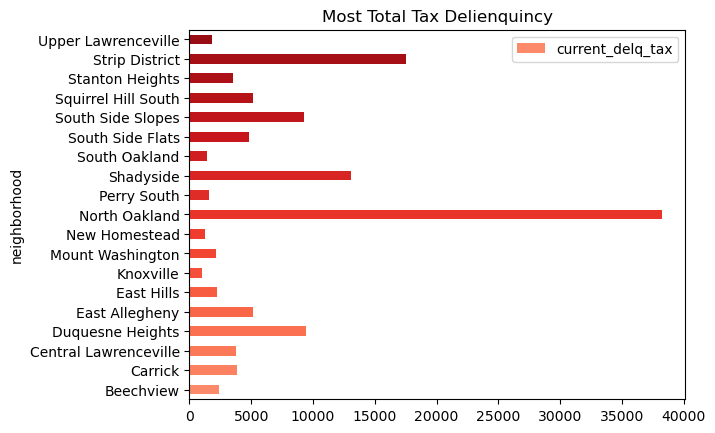

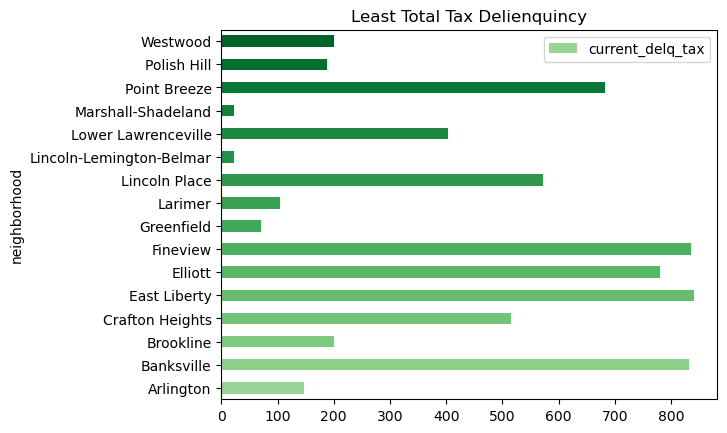

In [8]:
colorsMost = cm.Reds(np.linspace(0.4, 0.9, len(filteredTaxMost)))
colorsLeast = cm.Greens(np.linspace(0.4, 0.9, len(filteredTaxLeast)))

filteredTaxMost.plot(kind='barh', x='neighborhood', y='current_delq_tax', title="Most Total Tax Delienquincy", color=colorsMost)
filteredTaxLeast.plot(kind='barh', x='neighborhood', y='current_delq_tax', title="Least Total Tax Delienquincy",color=colorsLeast)

## Over The Years Total of Delinquency Property Tax

In [9]:
allTimeTax = tax.groupby('neighborhood')['prior_delq_tax'].sum().reset_index()

allfilter2 = allTimeTax['prior_delq_tax'] > 2000000
allfilterLeast = allTimeTax['prior_delq_tax'] > 1
allfilterLeast2 = allTimeTax['prior_delq_tax'] < 150000

allfilteredTaxLeast = allTimeTax[allfilterLeast2 & allfilterLeast]
allfilteredTaxMost = allTimeTax[allfilter2]


<Axes: title={'center': 'Least Total Prior Tax Delienquincy'}, ylabel='neighborhood'>

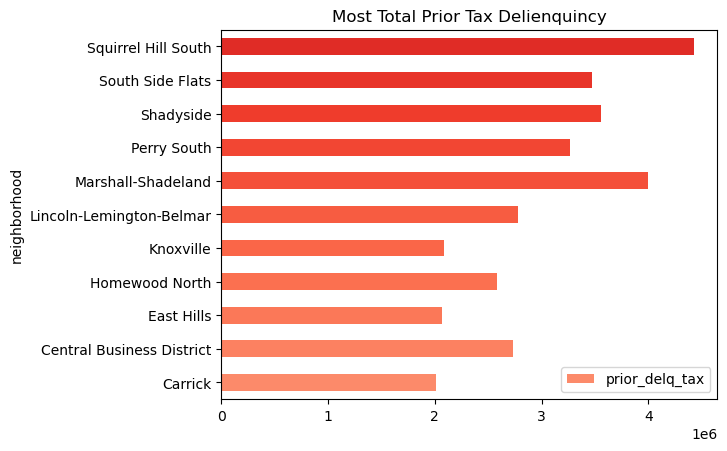

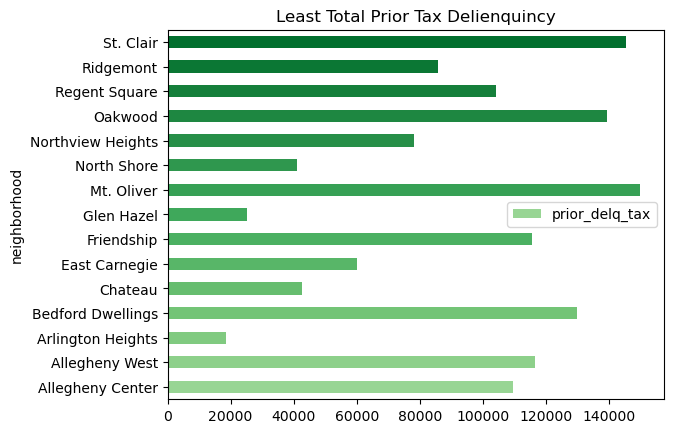

In [171]:
colorsMost = cm.Reds(np.linspace(0.4, 0.9, len(filteredTaxMost)))
colorsLeast = cm.Greens(np.linspace(0.4, 0.9, len(filteredTaxLeast)))

allfilteredTaxMost.plot(kind='barh', x='neighborhood', y='prior_delq_tax', title="Most Total Prior Tax Delienquincy", color=colorsMost)
allfilteredTaxLeast.plot(kind='barh', x='neighborhood', y='prior_delq_tax', title="Least Total Prior Tax Delienquincy",color=colorsLeast)

## How Many Instances of Delinquent Property Tax

This counts up the total amount of propertes that showed up in the database for each neighborhood. This should account for if one neibhood had one really bad landowner that wasn't reflective of all of the area.

In [11]:
taxMany = tax.groupby('neighborhood')['current_delq_tax'].count().reset_index()

filterMany2 = taxMany['current_delq_tax'] > 500
filterManyLeast = taxMany['current_delq_tax'] > 0.0001
filterManyLeast2 = taxMany['current_delq_tax'] < 20

filteredManyTaxLeast = taxMany[filterManyLeast2 & filterManyLeast]
filteredManyTaxMost = taxMany[filterMany2]


<Axes: title={'center': 'Least instances Tax Delienquincy'}, ylabel='neighborhood'>

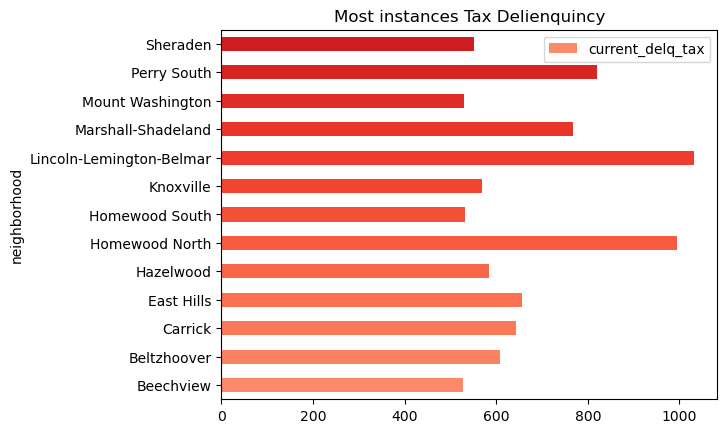

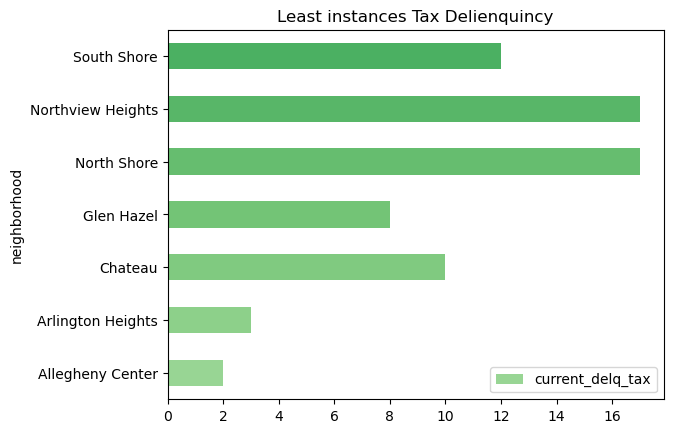

In [12]:
colorsMost = cm.Reds(np.linspace(0.4, 0.9, len(filteredTaxMost)))
colorsLeast = cm.Greens(np.linspace(0.4, 0.9, len(filteredTaxLeast)))

filteredManyTaxMost.plot(kind='barh', x='neighborhood', y='current_delq_tax', title="Most instances Tax Delienquincy",color=colorsMost)
filteredManyTaxLeast.plot(kind='barh', x='neighborhood', y='current_delq_tax', title="Least instances Tax Delienquincy",color=colorsLeast)

# The Richest Neighborhood:


In [13]:
many_map = neighborhoods.merge(taxMany, how='left', left_on='hood', right_on='neighborhood')
many_map['log_tax'] = np.log1p(many_map['current_delq_tax'])

many_map.plot(
    column='log_tax',
    cmap='RdYlGn_r',
    edgecolor="white",
    legend=True,
    legend_kwds={'label': "Log(Current Delinquent Tax)"},
    figsize=(15, 10),
    missing_kwds={"color": "black"}
)

NameError: name 'neighborhoods' is not defined

<Axes: >

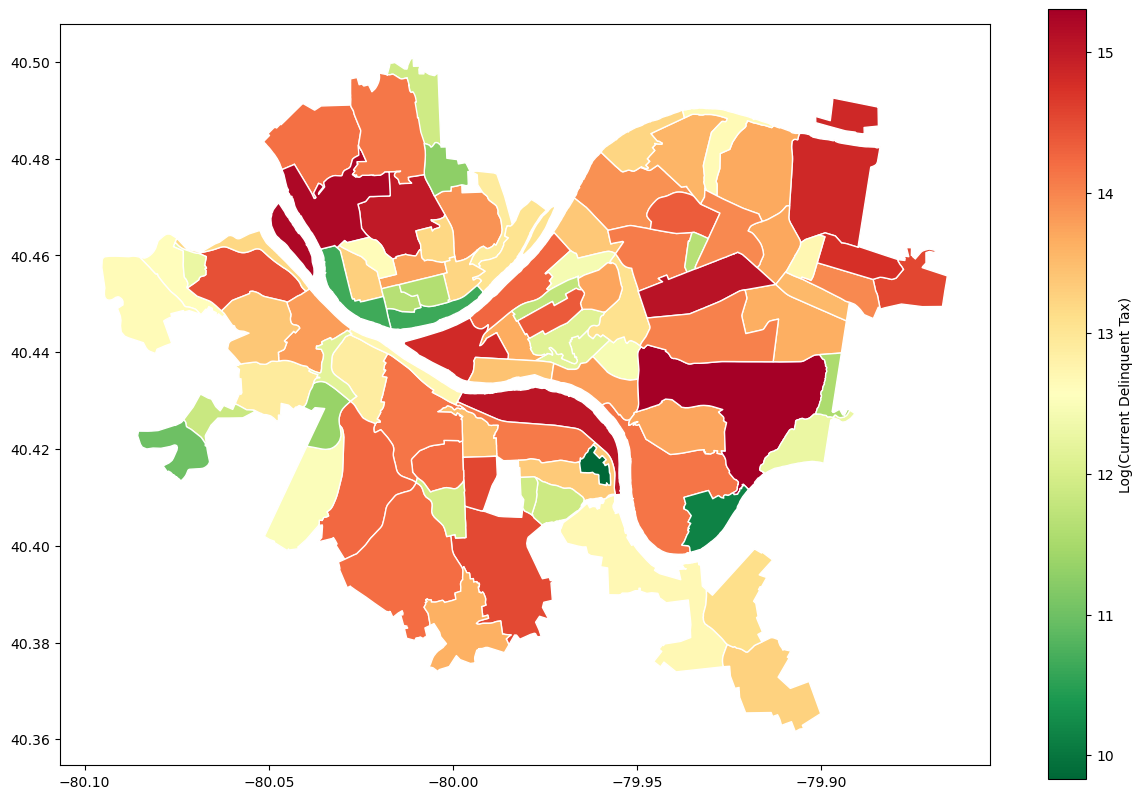

In [124]:
allTime_map = neighborhoods.merge(allTimeTax, how='left', left_on='hood', right_on='neighborhood')
allTime_map['log_tax'] = np.log1p(allTime_map['prior_delq_tax'])

allTime_map.plot(
    column='log_tax',
    cmap='RdYlGn_r',
    edgecolor="white",
    legend=True,
    legend_kwds={'label': "Log(Total Delinquent Tax)"},
    figsize=(15, 10),
    missing_kwds={"color": "black"}
)

# Conclusion:


In [14]:
taxTotal.head(20)

,neighborhood,current_delq_tax
0,Allegheny Center,0.00
1,Allegheny West,0.00
2,Allentown,0.00
3,Arlington,147.63
4,Arlington Heights,0.00
5,Banksville,831.47
6,Bedford Dwellings,0.00
7,Beechview,2367.55
8,Beltzhoover,0.00
9,Bloomfield,0.00


In [19]:
taxMany_ranks = taxMany['current_delq_tax'].rank(method='min')
taxMany['taxMany_rank'] = taxMany_ranks.astype(int)
allTimeTax_ranks = allTimeTax['prior_delq_tax'].rank(method='min')
allTimeTax['allTimeTax_rank'] = allTimeTax_ranks.astype(int)
taxTotal_ranks = taxTotal['current_delq_tax'].rank(method='min')
taxTotal['taxTotal_rank'] = taxTotal_ranks.astype(int)


merged1 = taxMany[['neighborhood', 'taxMany_rank']].merge(allTimeTax[['neighborhood', 'allTimeTax_rank']], 
                                                          how='inner', on='neighborhood')
merged = merged1.merge(taxTotal[['neighborhood', 'taxTotal_rank']], how='inner', on='neighborhood')
merged['combined_score'] = merged['taxMany_rank'] + merged['allTimeTax_rank'] + merged['taxTotal_rank']

merged_sorted = merged.sort_values(by='combined_score')
merged_sorted = merged_sorted.reset_index(drop=False)

top = merged_sorted.head(21)
top


,index,neighborhood,taxMany_rank,allTimeTax_rank,taxTotal_rank,combined_score
0,4,Arlington Heights,2,1,1,4
1,35,Glen Hazel,3,2,1,6
2,21,Chateau,4,4,1,9
3,57,North Shore,6,3,1,10
4,0,Allegheny Center,1,9,1,11
5,58,Northview Heights,6,6,1,13
6,26,East Carnegie,8,5,1,14
7,66,Regent Square,9,8,1,18
8,67,Ridgemont,12,7,1,20
9,1,Allegheny West,9,11,1,21


# Final Search Tool

In [192]:
where = input()

query_mask = taxTotal['neighborhood'].str.contains(where, na=False)
query_mask1 = taxMany['neighborhood'].str.contains(where, na=False)
query_mask2 = allTimeTax['neighborhood'].str.contains(where, na=False)

filtered_taxTotal = taxTotal[query_mask]
filtered_taxMany = taxMany[query_mask1]
filtered_allTimeTax = allTimeTax[query_mask2]

filtered_search = filtered_taxTotal.merge(filtered_taxMany, on='neighborhood').merge(filtered_allTimeTax, on='neighborhood')
filtered_search

 South Shore


,neighborhood,current_delq_tax_x,current_delq_tax_y,prior_delq_tax
0,South Shore,0.0,12,332941.0
